# 1- Importando a base de dados.

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
query = "SELECT * FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` WHERE date BETWEEN'20170101' AND '20170131' "

In [106]:
query

"SELECT * FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` WHERE date BETWEEN'20170101' AND '20170131' "

In [107]:
df = pd.read_gbq(query=query, project_id='axial-entity-309700', dialect='standard', dtype={'visitId':object})

Requesting query... ok.
Job ID: 1940cccc-48ca-48f3-a88f-7cfbcc45c98c
Query running...
  Elapsed 7.32 s. Waiting...
  Elapsed 8.54 s. Waiting...
  Elapsed 9.9 s. Waiting...
  Elapsed 11.12 s. Waiting...
  Elapsed 12.5 s. Waiting...
  Elapsed 13.71 s. Waiting...
  Elapsed 15.07 s. Waiting...
  Elapsed 16.28 s. Waiting...
  Elapsed 17.65 s. Waiting...
  Elapsed 18.86 s. Waiting...
  Elapsed 20.23 s. Waiting...
  Elapsed 21.44 s. Waiting...
Query done.
Processed: 5.4 GB Billed: 5.4 GB
Standard price: $0.03 USD

Retrieving results...
Got 64694 rows.

Total time taken 676.64 s.
Finished at 2021-04-06 20:53:15.


In [108]:
df.shape

(64694, 16)

In [109]:
df.head()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,None,1,1485032920,1485032920,20170121,"{'screenviews': None, 'hits': 1, 'totalTransac...","{'adContent': None, 'keyword': None, 'referral...",{'flashVersion': 'not available in demo datase...,"{'city': '(not set)', 'continent': 'Americas',...","[{'value': 'North America', 'index': 4}]","[{'product': [], 'transaction': None, 'isSecur...",1855060739215171075,None,None,Direct,Not Socially Engaged
1,None,1,1485046343,1485046343,20170121,"{'screenviews': None, 'hits': 1, 'totalTransac...","{'adContent': None, 'keyword': None, 'referral...",{'flashVersion': 'not available in demo datase...,"{'city': 'not available in demo dataset', 'con...","[{'value': 'EMEA', 'index': 4}]","[{'product': [], 'transaction': None, 'isSecur...",0313317105004827030,None,None,Organic Search,Not Socially Engaged
2,None,1,1485033332,1485033332,20170121,"{'screenviews': None, 'hits': 1, 'totalTransac...","{'adContent': None, 'keyword': None, 'referral...",{'flashVersion': 'not available in demo datase...,"{'city': '(not set)', 'continent': 'Americas',...","[{'value': 'North America', 'index': 4}]","[{'product': [], 'transaction': None, 'isSecur...",4390276725642743703,None,None,Direct,Not Socially Engaged
3,None,1,1485038895,1485038895,20170121,"{'screenviews': None, 'hits': 1, 'totalTransac...","{'adContent': None, 'keyword': None, 'referral...",{'flashVersion': 'not available in demo datase...,"{'city': 'not available in demo dataset', 'con...","[{'value': 'EMEA', 'index': 4}]","[{'product': [], 'transaction': None, 'isSecur...",8081748677261294867,None,None,Organic Search,Not Socially Engaged
4,None,1,1484996171,1484996171,20170121,"{'screenviews': None, 'hits': 1, 'totalTransac...","{'adContent': None, 'keyword': None, 'referral...",{'flashVersion': 'not available in demo datase...,"{'city': 'not available in demo dataset', 'con...","[{'value': 'EMEA', 'index': 4}]","[{'product': [], 'transaction': None, 'isSecur...",8736621278905506906,None,None,Direct,Not Socially Engaged


# 2- Tratamento de dados

- Criando variáveis com a coluna hits.

In [110]:
produtos_sessao = []
precos_sessao = []

for linha in df.hits :
  produtos_hit = []
  precos_hit = []
  for hit in linha:
    for produto in hit['product'] :
      produtos_hit.append(produto['productSKU'])
      precos_hit.append(produto['productPrice'])
  produtos_sessao.append(produtos_hit)
  precos_sessao.append(sum(precos_hit))

In [111]:
len(precos_sessao)

64694

In [112]:
len(produtos_sessao)

64694

In [113]:
from sklearn.preprocessing import MultiLabelBinarizer

In [114]:
mlb = MultiLabelBinarizer()

In [115]:
s = pd.Series(produtos_sessao)

In [116]:
produtos = pd.DataFrame(mlb.fit_transform(s), columns=mlb.classes_, index=df.index)
produtos.head()

,10 52048,10 52147,10 52211,10 52213,10 52223,10 52225,10 52230,10 52231,10 52232,10 52233,...,GGOEYFKQ020699,GGOEYHPA003510,GGOEYHPA003610,GGOEYHPB072210,GGOEYOBR078599,GGOEYOCR077399,GGOEYOCR077799,GGOEYOCR078099,GGOEYOLR018699,GGOEYOLR080599
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
produtos.shape

(64694, 1109)

In [118]:
df = df.join(produtos)
df['preco'] = precos_sessao

In [119]:
df.head()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,...,GGOEYHPA003510,GGOEYHPA003610,GGOEYHPB072210,GGOEYOBR078599,GGOEYOCR077399,GGOEYOCR077799,GGOEYOCR078099,GGOEYOLR018699,GGOEYOLR080599,preco
0,None,1,1485032920,1485032920,20170121,"{'screenviews': None, 'hits': 1, 'totalTransac...","{'adContent': None, 'keyword': None, 'referral...",{'flashVersion': 'not available in demo datase...,"{'city': '(not set)', 'continent': 'Americas',...","[{'value': 'North America', 'index': 4}]",...,0,0,0,0,0,0,0,0,0,0
1,None,1,1485046343,1485046343,20170121,"{'screenviews': None, 'hits': 1, 'totalTransac...","{'adContent': None, 'keyword': None, 'referral...",{'flashVersion': 'not available in demo datase...,"{'city': 'not available in demo dataset', 'con...","[{'value': 'EMEA', 'index': 4}]",...,0,0,0,0,0,0,0,0,0,0
2,None,1,1485033332,1485033332,20170121,"{'screenviews': None, 'hits': 1, 'totalTransac...","{'adContent': None, 'keyword': None, 'referral...",{'flashVersion': 'not available in demo datase...,"{'city': '(not set)', 'continent': 'Americas',...","[{'value': 'North America', 'index': 4}]",...,0,0,0,0,0,0,0,0,0,0
3,None,1,1485038895,1485038895,20170121,"{'screenviews': None, 'hits': 1, 'totalTransac...","{'adContent': None, 'keyword': None, 'referral...",{'flashVersion': 'not available in demo datase...,"{'city': 'not available in demo dataset', 'con...","[{'value': 'EMEA', 'index': 4}]",...,0,0,0,0,0,0,0,0,0,0
4,None,1,1484996171,1484996171,20170121,"{'screenviews': None, 'hits': 1, 'totalTransac...","{'adContent': None, 'keyword': None, 'referral...",{'flashVersion': 'not available in demo datase...,"{'city': 'not available in demo dataset', 'con...","[{'value': 'EMEA', 'index': 4}]",...,0,0,0,0,0,0,0,0,0,0


In [120]:
df.shape

(64694, 1126)

## 2.2 - Criando um novo df.

In [121]:
visitas = df.drop(columns = ['hits','customDimensions'],axis=1)

In [122]:
visitas.head()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,fullVisitorId,...,GGOEYHPA003510,GGOEYHPA003610,GGOEYHPB072210,GGOEYOBR078599,GGOEYOCR077399,GGOEYOCR077799,GGOEYOCR078099,GGOEYOLR018699,GGOEYOLR080599,preco
0,None,1,1485032920,1485032920,20170121,"{'screenviews': None, 'hits': 1, 'totalTransac...","{'adContent': None, 'keyword': None, 'referral...",{'flashVersion': 'not available in demo datase...,"{'city': '(not set)', 'continent': 'Americas',...",1855060739215171075,...,0,0,0,0,0,0,0,0,0,0
1,None,1,1485046343,1485046343,20170121,"{'screenviews': None, 'hits': 1, 'totalTransac...","{'adContent': None, 'keyword': None, 'referral...",{'flashVersion': 'not available in demo datase...,"{'city': 'not available in demo dataset', 'con...",0313317105004827030,...,0,0,0,0,0,0,0,0,0,0
2,None,1,1485033332,1485033332,20170121,"{'screenviews': None, 'hits': 1, 'totalTransac...","{'adContent': None, 'keyword': None, 'referral...",{'flashVersion': 'not available in demo datase...,"{'city': '(not set)', 'continent': 'Americas',...",4390276725642743703,...,0,0,0,0,0,0,0,0,0,0
3,None,1,1485038895,1485038895,20170121,"{'screenviews': None, 'hits': 1, 'totalTransac...","{'adContent': None, 'keyword': None, 'referral...",{'flashVersion': 'not available in demo datase...,"{'city': 'not available in demo dataset', 'con...",8081748677261294867,...,0,0,0,0,0,0,0,0,0,0
4,None,1,1484996171,1484996171,20170121,"{'screenviews': None, 'hits': 1, 'totalTransac...","{'adContent': None, 'keyword': None, 'referral...",{'flashVersion': 'not available in demo datase...,"{'city': 'not available in demo dataset', 'con...",8736621278905506906,...,0,0,0,0,0,0,0,0,0,0


- Tratando colunas que tem formato de dicionário.

In [123]:
dicionarios = ['device','trafficSource','geoNetwork','totals']

In [ ]:
import json

# Transformando as chaves dos dicionários em novas colunas
for coluna in dicionarios:
  visitas = visitas.join(
    pd.DataFrame([json.loads(json.dumps(linha))
      for linha in visitas[coluna]]) , rsuffix=('_' + coluna) )
visitas.drop( dicionarios, axis=1, inplace=True)



# Corrigindo o formato das colunas com valores quantitativos
totals = df.totals[0].keys()
totals = list(totals)
for coluna in totals:
  visitas[coluna] = pd.to_numeric(visitas[coluna])

  
# Limpando os dados
visitas.drop('adwordsClickInfo', axis=1, inplace=True)


# Remove as colunas cujo domínio só tem um elemento
coluna_na = []
for coluna in visitas.columns:
  print(str(coluna) + ': ' + str(len(visitas[coluna].unique())))
  if len( visitas[coluna].unique()) == 1:
    coluna_na.append(coluna)
visitas.drop( coluna_na, axis=1, inplace=True)

In [125]:
visitas.head()

,visitNumber,visitId,visitStartTime,date,fullVisitorId,channelGrouping,10 52048,10 52147,10 52211,10 52213,...,region,subContinent,bounces,hits,newVisits,pageviews,timeOnSite,totalTransactionRevenue,transactionRevenue,transactions
0,1,1485032920,1485032920,20170121,1855060739215171075,Direct,0,0,0,0,...,(not set),Northern America,1.0,1,1.0,1.0,NaN,NaN,NaN,NaN
1,1,1485046343,1485046343,20170121,0313317105004827030,Organic Search,0,0,0,0,...,not available in demo dataset,Southern Europe,1.0,1,1.0,1.0,NaN,NaN,NaN,NaN
2,1,1485033332,1485033332,20170121,4390276725642743703,Direct,0,0,0,0,...,(not set),Northern America,1.0,1,1.0,1.0,NaN,NaN,NaN,NaN
3,1,1485038895,1485038895,20170121,8081748677261294867,Organic Search,0,0,0,0,...,not available in demo dataset,Southern Europe,1.0,1,1.0,1.0,NaN,NaN,NaN,NaN
4,1,1484996171,1484996171,20170121,8736621278905506906,Direct,0,0,0,0,...,not available in demo dataset,Western Europe,1.0,1,1.0,1.0,NaN,NaN,NaN,NaN


In [126]:
visitas.drop(columns=['transactionRevenue','transactions'], axis=1, inplace=True)

- Convertendo a coluna "totaltransactionRevenue" para valor real.

In [127]:
visitas.totalTransactionRevenue = visitas.totalTransactionRevenue / 1000000

- Criando um novo df extraindo informações do df "visitas"

In [128]:
# criando lista com variáveis quantitativas
quant = list(set(totals) - set(coluna_na) - set(['transactionRevenue','transactions']))


#  criando um datafrrame com os resultados quantitativos das sessoes
visitas_totals = visitas.groupby('fullVisitorId', as_index=False)[quant].sum()


#  ultima visita

ultima_visita = visitas.groupby('fullVisitorId', as_index=False)
ultima_visita = ultima_visita['visitNumber'].max()


# Combinação entre visitantes e visitas únicos
usuarios_visitas_unicos = visitas.drop_duplicates(subset=['fullVisitorId','visitNumber'])


#  Datafame usuários com todos os usuários únicos e sua última visita
usuarios = pd.merge(ultima_visita, usuarios_visitas_unicos, left_on=['fullVisitorId', 'visitNumber'],
                    right_on=['fullVisitorId', 'visitNumber'], how='left')


#  primeira visita
primeira_visita = visitas.groupby('fullVisitorId', as_index=False)['visitNumber'].min()
primeira_visita.set_index('fullVisitorId', inplace=True)


# Dataframe usuários com todos os usuários únicos + sua última visita + primeira visita
usuarios = usuarios.join(primeira_visita, how = 'left', on = 'fullVisitorId', rsuffix='_primeira')
usuarios = pd.merge(usuarios, usuarios_visitas_unicos, left_on=['fullVisitorId','visitNumber_primeira'],
                    right_on=['fullVisitorId','visitNumber'], how='left', suffixes=('_ultima','_primeira'))

# Dataframe com todos usuários únicos + sua última visita + primmeira visita + somatório das colunas  quant
usuarios = pd.merge(usuarios, visitas_totals, left_on=['fullVisitorId'],
                   right_on=['fullVisitorId'], how='left')

#  Removendo totais
for i in quant:
    usuarios.drop(i+'_primeira',axis=1,inplace=True)
    usuarios.drop(i+'_ultima', axis=1, inplace=True)

# Calculando o tempo entre a primeira e a última visita
usuarios['tempo_visitas'] = usuarios.visitStartTime_ultima - usuarios.visitStartTime_primeira

- Enconding das variáveis e removendo colunas.

In [129]:
#  Removendo as colunas Ids
ids = ['fullVisitorId','visitId_ultima','visitId_primeira']
usuarios.drop(ids, axis=1, inplace=True)

#  Transformando as variáveis qualitativas em númericas.
from sklearn.preprocessing import LabelEncoder
qual = usuarios.dtypes[usuarios.dtypes == 'object'].keys()
for col in qual:
  encoder = LabelEncoder()
  usuarios[col] = encoder.fit_transform(list(usuarios[col].values.astype('str')))


- Transformando a coluna totalTransactionRevenue

In [130]:
usuarios.head()

,visitNumber_ultima,visitStartTime_ultima,date_ultima,channelGrouping_ultima,10 52048_ultima,10 52147_ultima,10 52211_ultima,10 52213_ultima,10 52223_ultima,10 52225_ultima,...,networkDomain_primeira,region_primeira,subContinent_primeira,totalTransactionRevenue,hits,pageviews,timeOnSite,bounces,newVisits,tempo_visitas
0,1,1484597865,15,7,0,0,0,0,0,0,...,1075,135,17,0.0,1,1.0,0.0,1.0,1.0,0
1,1,1485675517,27,7,0,0,0,0,0,0,...,2545,135,6,0.0,1,1.0,0.0,1.0,1.0,0
2,1,1483595731,3,6,0,0,0,0,0,0,...,892,128,12,0.0,5,5.0,78.0,0.0,1.0,0
3,1,1483629067,4,4,0,0,0,0,0,0,...,4503,49,21,0.0,1,1.0,0.0,1.0,1.0,0
4,1,1484513468,14,4,0,0,0,0,0,0,...,4644,135,13,0.0,1,1.0,0.0,1.0,1.0,0


In [131]:
usuarios['totalTransactionRevenue'] = usuarios['totalTransactionRevenue'].apply(lambda x: 1 if x > 0 else 0)

In [132]:
usuarios['totalTransactionRevenue'].value_counts()

0    52379
1      662
Name: totalTransactionRevenue, dtype: int64

# 3- Machine learning

- Dividindo o dataset em X e Y

In [133]:
X = usuarios.drop('totalTransactionRevenue', axis=1)
Y = usuarios['totalTransactionRevenue']

- Separando em amostras de treino e teste.

In [134]:
from sklearn.model_selection import train_test_split

In [458]:
X_treino, X_teste, Y_treino,Y_teste = train_test_split(X,Y, test_size=0.15, random_state=42)

In [459]:
#  Removendo dados duplicados
X_treino = X_treino.loc[:,~X_treino.columns.duplicated()]
X_teste = X_teste.loc[:,~X_teste.columns.duplicated()]

- Balanceando a base de dados.

In [460]:
X_treino['revenue'] = Y_treino

In [461]:
usuarios_com_gastos = X_treino[X_treino.revenue > 0]

In [462]:
usuarios_com_gastos.shape

(573, 2271)

In [463]:
usuarios_sem_gastos = X_treino[X_treino.revenue == 0]

In [464]:
usuarios_sem_gastos.shape

(44511, 2271)

In [465]:
from sklearn.utils import resample

In [466]:
usuarios_sem_gastos_ds = resample(usuarios_sem_gastos,
                                  replace=False,
                                  n_samples=15000,
                                  random_state=42)

In [467]:
usuarios_sem_gastos_ds.shape

(15000, 2271)

In [468]:
X_treino_ds = pd.concat([usuarios_sem_gastos_ds, usuarios_com_gastos])

In [469]:
X_treino_ds.shape

(15573, 2271)

In [470]:
X_treino = X_treino_ds.drop('revenue',axis=1)
Y_treino = X_treino_ds['revenue']

## Modelo base

In [471]:
from sklearn.dummy import DummyClassifier

In [472]:
dmclf = DummyClassifier()

In [473]:
dmclf.fit(X_treino, Y_treino)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [474]:
dmclf_pred = dmclf.predict(X_teste)

In [475]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [476]:
print(classification_report(Y_teste,dmclf_pred))

             precision    recall  f1-score   support

          0       0.99      0.96      0.98      7868
          1       0.00      0.00      0.00        89

avg / total       0.98      0.95      0.96      7957



Text(33,0.5,'Real ( 1 ou 0)')

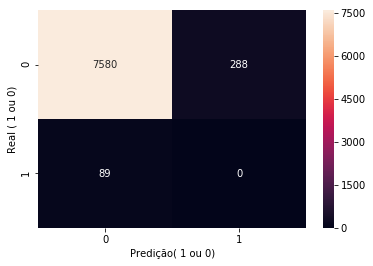

In [477]:
cm=confusion_matrix(Y_teste, dmclf_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

## LogisticRegression

In [478]:
from sklearn.linear_model import LogisticRegression

In [479]:
lr = LogisticRegression( random_state=42)

In [480]:
lr.fit(X_treino, Y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [481]:
y_pred = lr.predict(X_teste)

In [482]:
print(classification_report(Y_teste,y_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      7868
          1       0.23      0.18      0.20        89

avg / total       0.98      0.98      0.98      7957



Text(33,0.5,'Real ( 1 ou 0)')

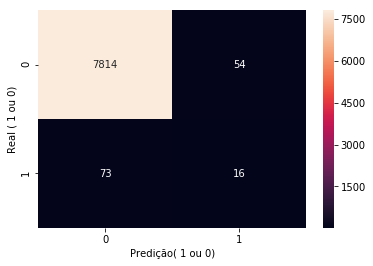

In [483]:
cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

## RandomForest

In [484]:
from sklearn.ensemble import RandomForestClassifier

In [485]:
rf= RandomForestClassifier( random_state=42)

In [486]:
rf.fit(X_treino, Y_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [487]:
rf_pred = rf.predict(X_teste)

In [488]:
print(classification_report(Y_teste,rf_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      7868
          1       0.51      0.26      0.34        89

avg / total       0.99      0.99      0.99      7957



Text(33,0.5,'Real ( 1 ou 0)')

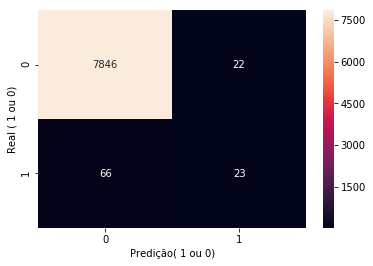

In [489]:
cm=confusion_matrix(Y_teste, rf_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

## GradientBoosting

In [490]:
from sklearn.ensemble import GradientBoostingClassifier

In [491]:
gb = GradientBoostingClassifier(random_state=42)

In [492]:
gb.fit(X_treino, Y_treino)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [493]:
gb_pred = gb.predict(X_teste)

In [494]:
print(classification_report(Y_teste, gb_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7868
          1       0.45      0.65      0.53        89

avg / total       0.99      0.99      0.99      7957



Text(33,0.5,'Real ( 1 ou 0)')

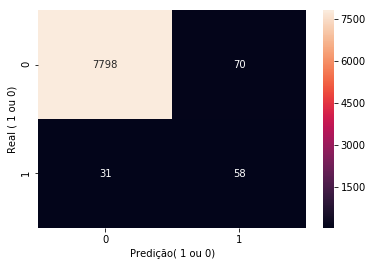

In [495]:
cm = confusion_matrix(Y_teste, gb_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

## XGBoost

In [496]:
from xgboost import XGBClassifier

In [497]:
xgb = XGBClassifier(seed=42, n_estimators=300)

In [498]:
xgb.fit(X_treino, Y_treino)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)

In [499]:
xgb_pred = xgb.predict(X_teste)

In [500]:
print(classification_report(Y_teste,xgb_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00      7868
          1       0.55      0.80      0.65        89

avg / total       0.99      0.99      0.99      7957



Text(33,0.5,'Real ( 1 ou 0)')

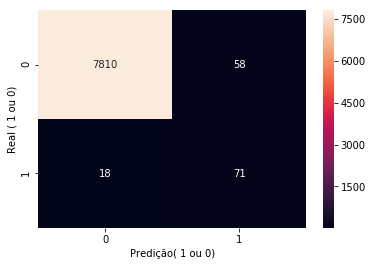

In [501]:
cm=confusion_matrix(Y_teste, xgb_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [507]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score

clf = XGBClassifier(seed=42, n_estimators=300)

clf.fit(X_treino, Y_treino)
train_acc = clf.score(X_treino, Y_treino)
val_score = cross_val_score(clf, X_treino, Y_treino, cv=5)
test_acc = clf.score(X_teste, Y_teste)
print('Treino:', train_acc)
print('Validation score', val_score.mean())
print('Teste:', test_acc)

print('ROC AUC')

y_proba_treino = clf.predict_proba(X_treino)
roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
print('Treino', roc_treino)

y_proba_teste = clf.predict_proba(X_teste)
roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
print('Test', roc_teste)
print('='*80)

Treino: 0.9938354844923907
Validation score 0.9808645675152137
Teste: 0.9904486615558628
ROC AUC
Treino 0.9990132635253054
Test 0.9945391087779828


In [509]:
y_proba = clf.predict_proba(X_teste)
auc = metrics.roc_auc_score(Y_teste, y_proba[:,1])
print(auc)

0.9945391087779828


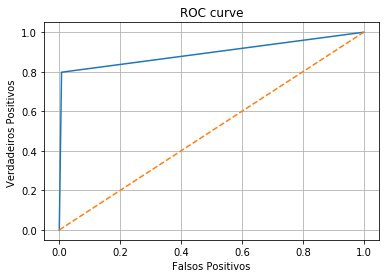

In [505]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_teste, xgb_pred)
plt.plot(fpr, tpr)

plt.plot([0,1],[0,1], '--', label='Previsão aleatória')

plt.title('ROC curve')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos ')
plt.grid(True)
plt.show()